<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2 - Ames Housing Data and Kaggle Challenge

# Contents (Part 1): 

- Executive Summary
- Problem Statement
- Background and Research
- Data Cleaning
- Exploratory Data Analysis

# Contents (Part 2): 

- Feature Engineering
- Data Dictionary
- Modelling
- Conclusion and Recommendations

# Contents (Part 3) - This notebook

- [Data Cleaning](#Data-Import-and-Cleaning)
- [Feature Engineering](#Feature-Engineering)

# Data Cleaning

## Importing necessary libraries 

The libraries below will be used in this notebook.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker

from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyRegressor
from sklearn import metrics

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# Overrides Matplotlib theme with Seaborn's 
sns.set(font_scale = 1.2)
sns.set_context('talk')

# Enables Pandas to display all the columns
pd.set_option('display.max_columns', None)

# Enables Pandas to display all the rows
pd.set_option('display.max_rows', None)

## Loading the test data for Kaggle

The following dataset will be loaded and used for model-building:

In [2]:
test = pd.read_csv('../data/test.csv')

In [3]:
test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [4]:
test.shape

(878, 80)

Some of the data is categorical and some is numeric. The dataset has 2051 rows and 81 columns.

## Standardising the format of column names 

The spaces will be changed to underscores, and the capital letters will be changed to lowercase letters.

In [5]:
test.columns = test.columns.str.lower().str.replace(' ','_')

In [6]:
test.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD


The column names have been changed.

## Checking for NaN values

The following is a graphical interpretation of NaN values in the top 15 columns with NaN values (the x-axis is the percentage of NaNs):

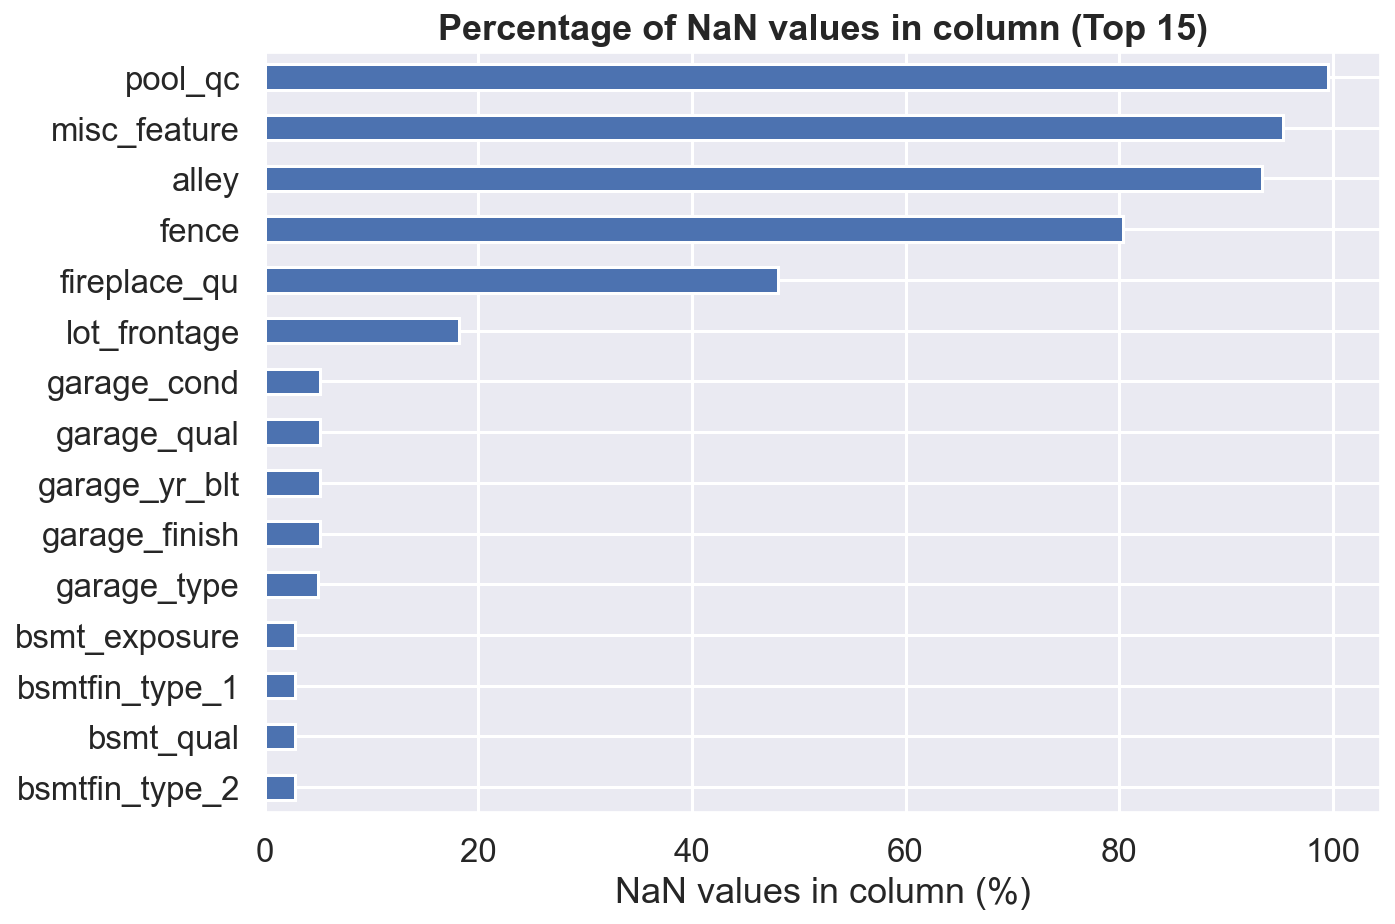

In [7]:
# Gets the percentage of NaN values in each column
isna_pct = test.isna().sum() / test.shape[0] * 100

# Plots a horizontal bar chart of the values
ax = (isna_pct).sort_values(ascending=True).tail(15).plot(kind='barh', figsize=(10,7))
ax.set_xlabel('NaN values in column (%)')
ax.set_title("Percentage of NaN values in column (Top 15)", fontweight="bold");

## Columns with a very high proportion of NaN values in the training set

We will drop the same columns as the ones dropped in the training set, and make the same changes as follows:

In [8]:
test.drop(columns='pool_qc', inplace=True)
test.drop(columns='misc_feature', inplace=True)
test.drop(columns='alley', inplace=True)
test.drop(columns='fence', inplace=True)
test['fireplace_qu'] = test['fireplace_qu'].fillna('NoFireplace')

## List of numerical columns with NaN values

The following is the list of NaN values where the datatype of the column is numerical.

In [9]:
test[test.loc[:, test.isna().any()].select_dtypes(exclude='object').columns].isna().sum()

lot_frontage     160
mas_vnr_area       1
garage_yr_blt     45
dtype: int64

## NaN values in `lot_frontage` 

This will be imputed in the same way as the training data.

In [10]:
test['lot_frontage'].groupby(test['lot_config']).median()

lot_config
Corner     79.5
CulDSac    48.5
FR2        65.0
FR3        48.5
Inside     67.0
Name: lot_frontage, dtype: float64

In [11]:
# Replaces the NaN value in the DataFrame when the conditions are met 
# E.g. when the lot frontage is NaN and the lot config is 'Corner', replace the NaN with 79.5
test.loc[(test['lot_frontage'].isna()) & (test['lot_config'] == 'Corner'), 'lot_frontage'] = 79.5
test.loc[(test['lot_frontage'].isna()) & (test['lot_config'] == 'CulDSac'), 'lot_frontage'] = 48.5
test.loc[(test['lot_frontage'].isna()) & (test['lot_config'] == 'FR2'), 'lot_frontage'] = 65.0
test.loc[(test['lot_frontage'].isna()) & (test['lot_config'] == 'FR3'), 'lot_frontage'] = 48.5
test.loc[(test['lot_frontage'].isna()) & (test['lot_config'] == 'Inside'), 'lot_frontage'] = 67.0

## NaN values in `mas_vnr_area` 

This will be imputed in the same way as the training data.

In [12]:
test['mas_vnr_area'] = test['mas_vnr_area'].fillna(0.0)

## NaN values in numerical garage-related columns

This will be imputed in the same way as the training data.

In [13]:
test['garage_yr_blt'] = test['garage_yr_blt'].fillna(0)

In [14]:
test[test.loc[:, test.isna().any()].select_dtypes(exclude='object').columns].isna().sum()

Series([], dtype: float64)

All the NaN values have been cleared.

## List of categorical columns with NaN values 

The following is the list of NaN values where the datatype of the column is not numerical.

In [15]:
test[test.loc[:, test.isna().any()].select_dtypes(include='object').columns].isna().sum()

mas_vnr_type       1
bsmt_qual         25
bsmt_cond         25
bsmt_exposure     25
bsmtfin_type_1    25
bsmtfin_type_2    25
electrical         1
garage_type       44
garage_finish     45
garage_qual       45
garage_cond       45
dtype: int64

## NaN values in `mas_vnr_type` 

The values will be replaced as per the training set:

In [16]:
test['mas_vnr_type'] = test['mas_vnr_type'].fillna('None')

## NaN values in categorical basement-related columns 

Here is the list again:

In [17]:
test[test.loc[:, test.isna().any()].select_dtypes(include='object').columns].isna().sum()

bsmt_qual         25
bsmt_cond         25
bsmt_exposure     25
bsmtfin_type_1    25
bsmtfin_type_2    25
electrical         1
garage_type       44
garage_finish     45
garage_qual       45
garage_cond       45
dtype: int64

The NaN values will be filled with 'NoBasement' to indicate 'No Basement' as with the training data:

In [18]:
bsmt_cat_null = ['bsmt_qual',
                 'bsmt_cond',
                 'bsmt_exposure',
                 'bsmtfin_type_1',
                 'bsmtfin_type_2',]

for col in bsmt_cat_null: 
    test[col] = test[col].fillna('NoBasement')

## NaN values in the electrical column 

There is just one value, and the row will be removed.

In [19]:
test.dropna(subset=['electrical'], inplace=True)

## NaN values in categorical garage-related columns

According to the data documentation, NA values indicate no garage. Referring to the list of categorical columns with NaNs:

In [20]:
test[test.loc[:, test.isna().any()].select_dtypes(include='object').columns].isna().sum()

garage_type      44
garage_finish    45
garage_qual      45
garage_cond      45
dtype: int64

The NaN values will be filled with 'NoGarage' to indicate 'No Garage' as with the training data:

In [21]:
garage_cat_null = ['garage_type',
                   'garage_finish',
                   'garage_qual',
                   'garage_cond']

for col in garage_cat_null: 
    test[col] = test[col].fillna('NoGarage')

## Checking for NaN values

In [22]:
test.isna().sum().sum()

0

There are no more NaN values in the DataFrame.

## Converting categorical (ordinal) data to numerical format for modelling 

First, we make a list of the relevant columns:

In [23]:
cat_ord_cols = ['lot_shape',
                'utilities',
                'land_slope',
                'exter_qual',
                'exter_cond',
                'bsmt_qual',
                'bsmt_cond',
                'bsmt_exposure',
                'bsmtfin_type_1',
                'bsmtfin_type_2',
                'heating_qc',
                'electrical',
                'kitchen_qual',
                'functional',
                'fireplace_qu',
                'garage_finish',
                'garage_qual',
                'garage_cond',
                'paved_drive']

We then specify the mappings for the `OrdinalEncoder` in lists:

In [24]:
lot_shape_cats = ['Reg', 'IR1', 'IR2', 'IR3']
utilities_cats = ['ELO', 'NoSeWa', 'NoSewr', 'AllPub']
land_slope_cats = ['Sev', 'Mod', 'Gtl']
exter_qual_cats = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
exter_cond_cats = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
bsmt_qual_cats = ['NoBasement', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
bsmt_cond_cats = ['NoBasement', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
bsmt_exposure_cats = ['NoBasement', 'No', 'Mn', 'Av', 'Gd']
bsmtfin_type1_cats = ['NoBasement', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']
bsmtfin_type2_cats = ['NoBasement', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']
heating_qc_cats = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
electrical_cats = ['Mix', 'FuseP', 'FuseF', 'FuseA', 'SBrkr']
kitchen_qual_cats = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
functional_cats = ['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ']
fireplace_qu_cats = ['NoFireplace', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
garage_finish_cats = ['NoGarage', 'Unf', 'RFn', 'Fin']
garage_qual_cats = ['NoGarage', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
garage_cond_cats = ['NoGarage', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
paved_drive_cats = ['N', 'P', 'Y']

Then, these mapping lists are complied into a single list.

In [25]:
ordinal_cats = [lot_shape_cats, 
                utilities_cats, 
                land_slope_cats, 
                exter_qual_cats, 
                exter_cond_cats, 
                bsmt_qual_cats, 
                bsmt_cond_cats, 
                bsmt_exposure_cats, 
                bsmtfin_type1_cats, 
                bsmtfin_type2_cats, 
                heating_qc_cats, 
                electrical_cats, 
                kitchen_qual_cats, 
                functional_cats, 
                fireplace_qu_cats, 
                garage_finish_cats, 
                garage_qual_cats, 
                garage_cond_cats, 
                paved_drive_cats]

The `OrdinalEncoder`is called on the columns. 

In [26]:
enc = OrdinalEncoder(categories = ordinal_cats)
test[cat_ord_cols] = enc.fit_transform(test[cat_ord_cols])

In [27]:
test.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type
0,2658,902301120,190,RM,69.0,9142,Pave,0.0,Lvl,3.0,Inside,2.0,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,2.0,1.0,Stone,2.0,3.0,1.0,1.0,0,1.0,0,1020,1020,GasA,3.0,N,1.0,908,1020,0,1928,0,0,2,0,4,2,1.0,9,7.0,0,0.0,Detchd,1910.0,1.0,1,440,1.0,1.0,2.0,0,60,112,0,0,0,0,4,2006,WD
1,2718,905108090,90,RL,67.0,9662,Pave,1.0,Lvl,3.0,Inside,2.0,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,2.0,2.0,CBlock,4.0,3.0,1.0,1.0,0,1.0,0,1967,1967,GasA,2.0,Y,4.0,1967,0,0,1967,0,0,2,0,6,2,2.0,10,7.0,0,0.0,Attchd,1977.0,3.0,2,580,3.0,3.0,2.0,170,0,0,0,0,0,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,1.0,Lvl,3.0,Inside,2.0,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,3.0,2.0,PConc,4.0,4.0,3.0,6.0,554,1.0,0,100,654,GasA,4.0,Y,4.0,664,832,0,1496,1,0,2,1,3,1,3.0,7,7.0,1,4.0,Attchd,2006.0,2.0,2,426,3.0,3.0,2.0,100,24,0,0,0,0,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,0.0,Lvl,3.0,Inside,2.0,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,3.0,2.0,CBlock,3.0,3.0,1.0,1.0,0,1.0,0,968,968,GasA,2.0,Y,4.0,968,0,0,968,0,0,1,0,2,1,2.0,5,7.0,0,0.0,Detchd,1935.0,1.0,2,480,2.0,3.0,0.0,0,0,184,0,0,0,0,7,2007,WD
4,625,535105100,20,RL,67.0,9500,Pave,1.0,Lvl,3.0,Inside,2.0,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,2.0,2.0,CBlock,4.0,3.0,1.0,4.0,609,1.0,0,785,1394,GasA,3.0,Y,4.0,1394,0,0,1394,1,0,1,1,3,1,2.0,6,7.0,2,4.0,Attchd,1963.0,2.0,2,514,3.0,3.0,2.0,0,76,0,0,185,0,0,7,2009,WD


The ordinal columns have been changed to numbers.

# Feature Engineering 

The feature engineering will be done according to how it was done on the training data:

## Creating columns

In [28]:
test['house_age'] = test['yr_sold'] - test['year_built']

In [29]:
# Get the difference in values for those rows where the 'garage_yr_blt' is not 0
test['garage_age'] = test['yr_sold'] - test['garage_yr_blt'][test['garage_yr_blt'] != 0]

# The newly created columns has NaNs that will be filled with 0.0
test['garage_age'] = test['garage_age'].fillna(0)

# Drop the 'garage_yr_blt' column
test.drop(columns='garage_yr_blt', inplace=True)

In [30]:
test['age_at_remod'] = test['yr_sold'] - test['year_remod/add']

test['total_baths'] = test['full_bath'] + test['half_bath'] + test['bsmt_full_bath'] + test['bsmt_half_bath']

test['garage_overall'] = test['garage_qual'] * test['garage_cars']

The engineered features have been added to the DataFrame.

## Dropping columns

In [31]:
to_drop = ['pid',
           'ms_subclass',
           'lot_frontage',
           'lot_area',
           'lot_shape',
           'utilities',
           'land_slope',
           'overall_cond',
           'exter_cond',
           'bsmt_cond',
           'bsmt_exposure',
           'bsmtfin_type_1',
           'bsmtfin_sf_1',
           'bsmtfin_type_2',
           'bsmtfin_sf_2',
           'bsmt_unf_sf',
           'electrical',
           '2nd_flr_sf',
           'low_qual_fin_sf',
           'bsmt_full_bath',
           'bsmt_half_bath',
           'half_bath',
           'bedroom_abvgr',
           'kitchen_abvgr',
           'functional',
           'garage_qual',
           'garage_cond',
           'paved_drive',
           'wood_deck_sf',
           'open_porch_sf',
           'enclosed_porch',
           '3ssn_porch',
           'screen_porch',
           'pool_area',
           'misc_val',
           'mo_sold',
           'yr_sold',
           'garage_age']

test = test.drop(columns=to_drop)

test.drop(columns=['year_built',
                    'year_remod/add',
                    'garage_cars',
                    'garage_area',
                    'fireplaces',
                    'totrms_abvgrd',
                    '1st_flr_sf'], inplace=True)

test.drop(columns=['exterior_2nd',
                   'condition_2',
                   'ms_zoning'], inplace=True)

In [32]:
# Before dropping the 'id' column, save the ids
test_ids = test['id']

In [33]:
test.drop(columns=['id'], inplace=True)

The columns to be dropped have been removed from the DataFrame.

## Dummy encoding

In [34]:
test = pd.get_dummies(test, drop_first=False)

The remaining categorical features are now in numeric form.

# Modelling 

Due to the dummy encoding, there are differing features in the two DataFrames. We will have to equalise them. 

First, the train.csv that has gone through cleaning and feature engineering is loaded.

In [35]:
train = pd.read_csv('../data/train_cleaned_engineered.csv')

The differing columns between the DataFrames are then obtained.

In [36]:
set(train.columns).symmetric_difference(test.columns)

{'exterior_1st_CBlock',
 'exterior_1st_ImStucc',
 'exterior_1st_PreCast',
 'exterior_1st_Stone',
 'heating_Floor',
 'heating_OthW',
 'heating_Wall',
 'mas_vnr_type_CBlock',
 'neighborhood_GrnHill',
 'neighborhood_Landmrk',
 'roof_matl_Membran',
 'roof_matl_Metal',
 'roof_matl_Roll',
 'sale_type_VWD',
 'saleprice'}

A list of the differing features is made (excluding `saleprice`):

In [37]:
col_list = ['exterior_1st_CBlock',
 'exterior_1st_ImStucc',
 'exterior_1st_PreCast',
 'exterior_1st_Stone',
 'heating_Floor',
 'heating_OthW',
 'heating_Wall',
 'mas_vnr_type_CBlock',
 'neighborhood_GrnHill',
 'neighborhood_Landmrk',
 'roof_matl_Membran',
 'roof_matl_Metal',
 'roof_matl_Roll',
 'sale_type_VWD']

A list of the differing features in the training DataFrame is created:

In [38]:
in_train = []

for col in col_list:
    if col in train.columns:
        in_train.append(col)
        
in_train

['exterior_1st_CBlock',
 'exterior_1st_ImStucc',
 'exterior_1st_Stone',
 'heating_OthW',
 'heating_Wall',
 'neighborhood_GrnHill',
 'neighborhood_Landmrk',
 'roof_matl_Membran']

A list of the differing features in the testing DataFrame is created:

In [39]:
in_test = []

for col in col_list:
    if col in test.columns:
        in_test.append(col)
        
in_test

['exterior_1st_PreCast',
 'heating_Floor',
 'mas_vnr_type_CBlock',
 'roof_matl_Metal',
 'roof_matl_Roll',
 'sale_type_VWD']

The differing features are dropped from the respective DataFrames:

In [40]:
train.drop(columns=in_train, inplace=True)
test.drop(columns=in_test, inplace=True)

The model is fit using the training data and the testing data is used to generate the predictions:

In [41]:
# Splitting the training set into X and y
X = train.drop('saleprice', axis=1)
y = train['saleprice'].values

# Using the Standard Scaler
ss = StandardScaler()
ss.fit(X)
X_train = ss.transform(X)
ss.fit(test)
X_train = ss.transform(test)

# Instantiate the model
ridge = RidgeCV()
ridge.fit(X, y)

# Getting the predictions
y_preds_kaggle = ridge.predict(test)

The predictions are then properly formatted into a DataFrame and then saved to a .csv file:

In [42]:
# Rounds the values according to the sample submission file
y_preds_kaggle = np.round(y_preds_kaggle, decimals=4)

# Creates the DataFrame of predictions and names the columns accordingly
predictions = pd.DataFrame({'Id': test_ids, 'saleprice': y_preds_kaggle})

# Sorts the predictions properly according to the 'Id'
predictions = predictions.sort_values(by='Id')

# Saves the predictions to a .csv file
predictions.to_csv('../data/predictions.csv', index=False)

The predictions are ready for the Kaggle submission.

-- End of Notebook --